In [1]:
import numpy as np
import pandas as pd

In [3]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.8 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 11.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 4.5 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [6]:
data = pd.read_csv('KwhConsumptionBlower78_3.csv',index_col='TxnDate',parse_dates=True)

In [7]:
data.head()

,Unnamed: 0,TxnTime,Consumption
TxnDate,,,
2022-02-01,0,14:41:48,1.016
2022-02-01,1,17:28:44,0.928
2022-02-01,2,19:51:07,0.988
2022-02-01,3,07:26:39,1.126
2022-02-01,4,05:20:47,0.886


<AxesSubplot: xlabel='TxnDate'>

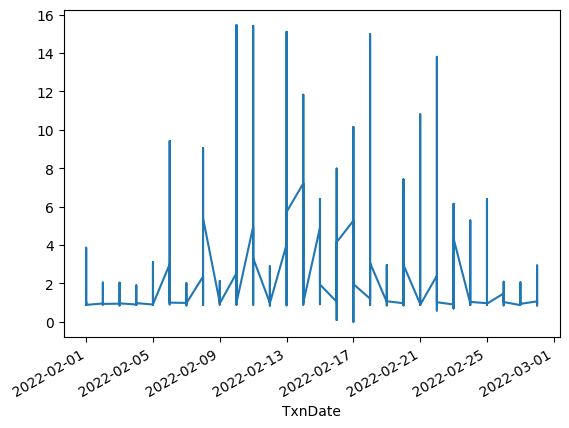

In [8]:
data['Consumption'].plot()

In [9]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(data['Consumption'])
#p value < 0.05 (ideal for stationarity)

1. ADF :  -4.908941905240831
2. P-Value :  3.350330868366777e-05
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression: 1733
5. Critical Values :
	 1% :  -3.434129003198009
	 5% :  -2.863209218981072
	 10% :  -2.5676586444827656


In [10]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data['Consumption'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7092.978, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8238.170, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7783.664, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7101.497, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8236.170, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7105.408, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7093.877, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7093.487, Time=1.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7102.188, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7093.849, Time=0.83 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7091.101, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7382.789, Time=0.10 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7092.590, Time=0.45 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : 

In [11]:
print(data.shape) #from previous output, the best intercepts = 3,1,1

(1748, 3)


In [12]:
train=data.iloc[:-30]
test=data.iloc[-30:]
print(train.shape,test.shape)

(1718, 3) (30, 3)


In [14]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Consumption'],order=(3,1,1)) #from auto_Arima function, best intercept
model=model.fit()
model.summary() 

/home/akshay/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/akshay/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/akshay/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                 1718
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -3493.486
Date:                Sat, 15 Apr 2023   AIC                           6996.972
Time:                        21:50:00   BIC                           7024.214
Sample:                             0   HQIC                          7007.052
                               - 1718                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0649      0.021     -3.156      0.002      -0.105      -0.025
ar.L2         -0.0990      0.020     -5.075      0.000      -0.137      -0.061
ar.L3         -0.0588      0.021     -2.798      0.005      -0.100      -0.018
ma.L1         -0.9005      0.011    -81.693      0.000      -0.922      -0.879
sigma2         3.4220      0.052     66.257      0.000       3.321       3.523
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6489.96
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                             2.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/akshay/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot: xlabel='TxnDate'>

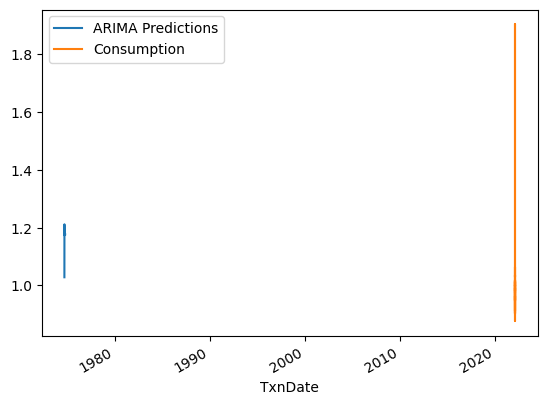

In [20]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Consumption'].plot(legend=True)